In [69]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
from source.tserie import TSerie
from source.read_ontario import read_ontario
from source.utils import commonWindows
from source.torch_utils import getContrastiveFeatures
from cuml.manifold import UMAP
from ccpca import CCPCA

VIS_PATH = 'visualizations'
SMOOTH = 0 # 8 -1 if you don't want to smooth the data otherwise the size of the smooth window
LOSS = 'SimCLR' # SupConLoss | SimCLR
MODE = 'subsequences' # subsequences - shape
# MODE = 'shape' # subsequences - shape
EPOCHS = 800
BATCH_SIZE = 128
ENC_SIZE = 20 # 8
POLLUTANTS = ['PM25', 'SO2', 'CO'] # ['NO', 'NOx', 'NO2', 'SO2', 'CO', 'O3', 'PM25']
CONV_FILTERS = [16, 32]
CONV_KERNELS = [5, 5]
UMAP_NEIGHBORS = 15
N_VIZ_SAMPLES = 600
FEAT_SIZE = 32

# Months case

In [70]:
from source.datasets import loadFuncionalModel, loadNatops, loadWafer, loadSelfRegulationSCP2, loadBasicMotions, loadEarthquakes, loadItalyPowerDemand, loadEigenWorms
# windows_map = read_ontario(granularity='daily', cache=False)
X_train, y_train, X_test, y_test, classLabels= loadBasicMotions()
# X_train, y_train, X_test, y_test, classLabels= loadItalyPowerDemand()
# pollutans = POLLUTANTS
# windows, dates, station_ids, stations = commonWindows(windows_map, pollutans)

In [71]:
mts = TSerie(X=X_train.transpose([0, 2, 1]), y = y_train)

if SMOOTH > 0:
    mts.smooth(window_size=SMOOTH)

if MODE == 'shape':
    mts.shapeNormalizization()
else:
    mts.minMaxNormalizization()


Loaded mts - N: 40, T: 100, D: 6 


In [72]:

mts.features = getContrastiveFeatures(
    mts.X.transpose([0, 2, 1]), mts.y, 
    epochs = EPOCHS, 
    batch_size = BATCH_SIZE,
    loss_metric= LOSS,
    mode = MODE, 
    encoding_size = ENC_SIZE,
    conv_filters = CONV_FILTERS,
    conv_kernels = CONV_KERNELS,
    use_KL_regularizer = True,
    feat_size=FEAT_SIZE,
)

Subsequence length: 80

Epoch[1] Train loss    avg: 9.046646118164062

Epoch[10] Train loss    avg: 7.305241107940674

Epoch[20] Train loss    avg: 5.45122766494751

Epoch[30] Train loss    avg: 4.7189836502075195

Epoch[40] Train loss    avg: 4.592138767242432

Epoch[50] Train loss    avg: 4.439388275146484

Epoch[60] Train loss    avg: 4.4151997566223145

Epoch[70] Train loss    avg: 4.394774913787842

Epoch[80] Train loss    avg: 4.402472972869873

Epoch[90] Train loss    avg: 4.37030029296875

Epoch[100] Train loss    avg: 4.361632823944092

Epoch[110] Train loss    avg: 4.369416236877441

Epoch[120] Train loss    avg: 4.340052604675293

Epoch[130] Train loss    avg: 4.301283359527588

Epoch[140] Train loss    avg: 4.220865249633789

Epoch[150] Train loss    avg: 4.074743747711182

Epoch[160] Train loss    avg: 3.929347038269043

Epoch[170] Train loss    avg: 3.791048526763916

Epoch[180] Train loss    avg: 3.745129346847534

Epoch[190] Train loss    avg: 3.5950310230255127

Epoch[200] Train loss    avg: 3.4728283882141113

Epoch[210] Train loss    avg: 3.3222410678863525

Epoch[220] Train loss    avg: 3.17460560798645

Epoch[230] Train loss    avg: 3.0537891387939453

Epoch[240] Train loss    avg: 3.0191566944122314

Epoch[250] Train loss    avg: 2.9573516845703125

Epoch[260] Train loss    avg: 2.9073805809020996

Epoch[270] Train loss    avg: 2.808100461959839

Epoch[280] Train loss    avg: 2.784024238586426

Epoch[290] Train loss    avg: 2.7060749530792236

Epoch[300] Train loss    avg: 2.695674180984497

Epoch[310] Train loss    avg: 2.628600597381592

Epoch[320] Train loss    avg: 2.547525405883789

Epoch[330] Train loss    avg: 2.4923675060272217

Epoch[340] Train loss    avg: 2.459218740463257

Epoch[350] Train loss    avg: 2.4142439365386963

Epoch[360] Train loss    avg: 2.4255833625793457

Epoch[370] Train loss    avg: 2.3851184844970703

Epoch[380] Train loss    avg: 2.3575713634490967

Epoch[390] Train loss    avg: 2.3278913497924805

Epoch[400] Train loss    avg: 2.3224616050720215

Epoch[410] Train loss    avg: 2.2842040061950684

Epoch[420] Train loss    avg: 2.2751705646514893

Epoch[430] Train loss    avg: 2.2477447986602783

Epoch[440] Train loss    avg: 2.2483224868774414

Epoch[450] Train loss    avg: 2.224759101867676

Epoch[460] Train loss    avg: 2.22395920753479

Epoch[470] Train loss    avg: 2.1700809001922607

Epoch[480] Train loss    avg: 2.1574065685272217

Epoch[490] Train loss    avg: 2.18064284324646

Epoch[500] Train loss    avg: 2.1394267082214355

Epoch[510] Train loss    avg: 2.1382806301116943

Epoch[520] Train loss    avg: 2.1395716667175293

Epoch[530] Train loss    avg: 2.1094818115234375

Epoch[540] Train loss    avg: 2.0736804008483887

Epoch[550] Train loss    avg: 2.064444065093994

Epoch[560] Train loss    avg: 2.058757781982422

Epoch[570] Train loss    avg: 2.003221035003662

Epoch[580] Train loss    avg: 2.018906593322754

Epoch[590] Train loss    avg: 1.987280249595642

Epoch[600] Train loss    avg: 1.96501624584198

Epoch[610] Train loss    avg: 1.9422487020492554

Epoch[620] Train loss    avg: 1.8947010040283203

Epoch[630] Train loss    avg: 1.8764938116073608

Epoch[640] Train loss    avg: 1.872593879699707

Epoch[650] Train loss    avg: 1.8486113548278809

Epoch[660] Train loss    avg: 1.833693265914917

Epoch[670] Train loss    avg: 1.8437469005584717

Epoch[680] Train loss    avg: 1.8056073188781738

Epoch[690] Train loss    avg: 1.764814853668213

Epoch[700] Train loss    avg: 1.7861812114715576

Epoch[710] Train loss    avg: 1.757551670074463

Epoch[720] Train loss    avg: 1.7200764417648315

Epoch[730] Train loss    avg: 1.7189090251922607

Epoch[740] Train loss    avg: 1.6995402574539185

Epoch[750] Train loss    avg: 1.7124497890472412

Epoch[760] Train loss    avg: 1.7183703184127808

Epoch[770] Train loss    avg: 1.6860554218292236

Epoch[780] Train loss    avg: 1.6725183725357056

Epoch[790] Train loss    avg: 1.667292594909668

Epoch[800] Train loss    avg: 1.6659419536590576

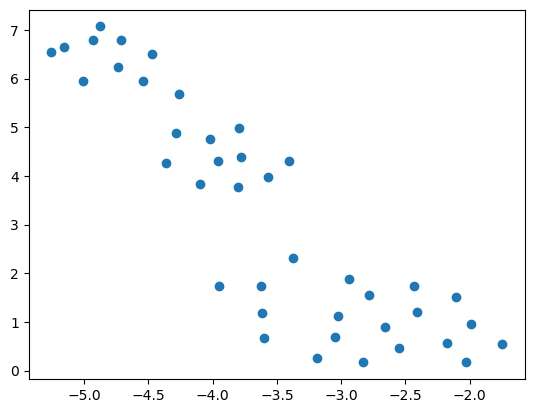

In [73]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=30)
# reducer = UMAP(n_components=2)
# reducer = UMAP(n_components=2, n_neighbors=10, min_dist=0.1)
# reducer = TSNE(n_components=2, metric='euclidean')

# coords = reducer.fit_transform(mts.features, y=mts.y)
coords = reducer.fit_transform(mts.features)
plt.scatter(coords[:, 0], coords[:, 1])

In [66]:
# year_ids[year_ids==2011]

In [67]:
# mts.features.min()
from sklearn.decomposition import PCA
d = mts.X.shape[2]
n = mts.X.shape[0]

features = mts.features.reshape([n, int(mts.features.shape[1] / d), d])
dfeatures = np.zeros([n, d])
for i in range(d):
    reducer = PCA(n_components=1)
    dfeatures[:,i] = reducer.fit_transform(features[:, :, i]).squeeze()


In [68]:
# dfeatures.shape
# year_ids.shape
# dfeatures[year_ids==2011].shape
# dfeatures[year_ids!=2011].shape

In [61]:
years = np.unique(mts.y)
group_ids = mts.y

fcs = []

for target in years:

    ccpca = CCPCA(n_components=1)
    # target = 2012
    ccpca.fit(
        dfeatures[group_ids==target],
        dfeatures[group_ids!=target],
        var_thres_ratio=0.5,
        n_alphas=40,
        max_log_alpha=0.5,
    )


    coords2 = ccpca.transform(dfeatures[group_ids==target])
    # coords2 = ccpca.transform(dfeatures[year_ids!=2011])
    # coords2 = ccpca.transform(dfeatures)
    best_alpha = ccpca.get_best_alpha()
    cpca_fcs = ccpca.get_feat_contribs()
    fcs.append(cpca_fcs)
    # print(cpca_fcs)
    # print(best_alpha)
    # plt.scatter(coords2[:, 0], coords2[:, 1])


[0 1 2 3]


<BarContainer object of 4 artists>

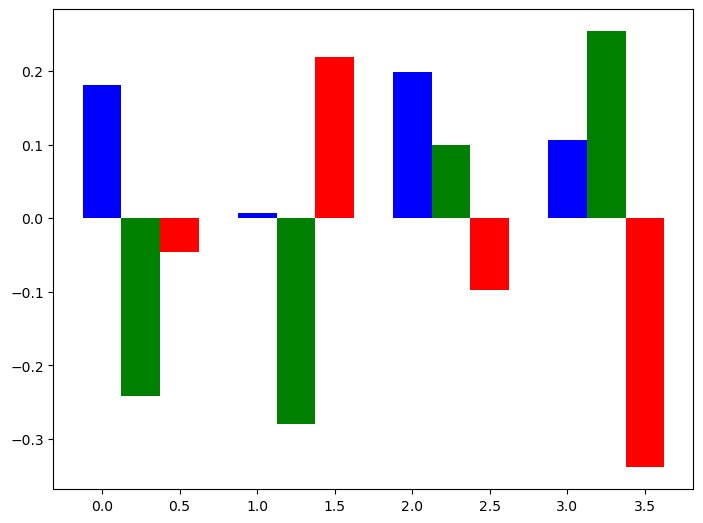

In [62]:
print(years)
fcs = np.array(fcs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.array([i for i in range (len(years))])
ax.bar(X + 0.00, fcs[:,0], color = 'b', width = 0.25)
ax.bar(X + 0.25, fcs[:,1], color = 'g', width = 0.25)
ax.bar(X + 0.50, fcs[:,2], color = 'r', width = 0.25)
# plt.bar(, fcs[:,0])

In [63]:
from server.source.storage import MTSStorage

# storage = MTSStorage(os.path.join(VIS_PATH ,'ontario_months.npy'))    
storage = MTSStorage(os.path.join(VIS_PATH ,'ontario_days.npy'))    
# storage.delete()
storage.load()

dimensions = [str(dim) for dim in range(mts.D)]

data = np.concatenate([mts.X_orig, mts.X], axis=2) 
storage.add_mts(
    'dataset' , data , 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'class': mts.y},
    labelsNames = {'class': classLabels},
    coords = {
        'coords': coords,
    },
    sampling=True,
    n_samples= N_VIZ_SAMPLES
)

storage.save()

mts shape: N: 40 -  T: 100 - D: 12
